**Élaboration d'indicateurs de vente en Python pour un caviste en ligne**

🎓 Projet réalisé dans le cadre de la formation diplômante "Data Analyst" d'OpenClassRooms.<br>
🛠 Mots clés : *Python, Pandas, Numpy, Seaborn, Matplotlib, Plotly Express.*

---

Dans ce scénario, un caviste cherchait à tirer parti de données issues de son site web récemment mis en place.
L'entreprise nous fournissait des données issues de son ERP, incomplètes, pour nous aider dans notre tâche. 

Il s'agissait donc de faire un grand travail de nettoyage, de vérification et d'analyse pour repérer les doublons, les valeurs manquantes ou atypiques.

Le résultat a permis de faire émerger les informations fiables et pertinentes que recherchait l'entreprise (chiffre d'affaire, nombre de ventes, etc..).

Le notebook ci-dessous reprend l'ensemble du cheminement réalisé, depuis l'import des données brutes jusqu'aux résultats.

---

👋 Merci de votre lecture !<br>
✏️ N'hésitez pas à me contacter si vous avez des remarques ou questions à FlorianData@pm.me

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyse-et-formatage-du-dataframe-&quot;Web&quot;-issu-du-site-internet" data-toc-modified-id="Analyse-et-formatage-du-dataframe-&quot;Web&quot;-issu-du-site-internet-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyse et formatage du dataframe "Web" issu du site internet</a></span></li><li><span><a href="#Analyse-et-formatage-du-dataframe-'Lien'-(données-communes-site-Web-/-ERP)." data-toc-modified-id="Analyse-et-formatage-du-dataframe-'Lien'-(données-communes-site-Web-/-ERP).-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analyse et formatage du dataframe 'Lien' (données communes site Web / ERP).</a></span></li><li><span><a href="#Analyse-et-formatage-du-dataframe-'ERP'" data-toc-modified-id="Analyse-et-formatage-du-dataframe-'ERP'-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analyse et formatage du dataframe 'ERP'</a></span></li><li><span><a href="#Mise-en-place-de-la-jointure-&quot;erp&quot;-<==>-&quot;lien&quot;,-sur-la-base-du-'product_id'" data-toc-modified-id="Mise-en-place-de-la-jointure-&quot;erp&quot;-<==>-&quot;lien&quot;,-sur-la-base-du-'product_id'-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mise en place de la jointure "erp" &lt;==&gt; "lien", sur la base du 'product_id'</a></span></li><li><span><a href="#Mise-en-place-jointure-finale-:-df-'erp_lien'-avec-df-'web_3'-mis-au-point-plus-haut" data-toc-modified-id="Mise-en-place-jointure-finale-:-df-'erp_lien'-avec-df-'web_3'-mis-au-point-plus-haut-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Mise en place jointure finale : df 'erp_lien' avec df 'web_3' mis au point plus haut</a></span></li><li><span><a href="#Calcul-du-chiffre-d'affaire-par-produit-:" data-toc-modified-id="Calcul-du-chiffre-d'affaire-par-produit-:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Calcul du chiffre d'affaire par produit :</a></span></li><li><span><a href="#Calcul-du-CA-total" data-toc-modified-id="Calcul-du-CA-total-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Calcul du CA total</a></span></li><li><span><a href="#Analyse-des-prix-des-produits" data-toc-modified-id="Analyse-des-prix-des-produits-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Analyse des prix des produits</a></span></li></ul></div>

In [2]:
# import des librairies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# import des données

erp = pd.read_excel('erp.xlsx')
web = pd.read_excel('web.xlsx')
lien = pd.read_excel('liaison.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


# Analyse et formatage du dataframe "Web" issu du site internet

In [4]:
web.shape

(1513, 28)

In [5]:
web.iloc[0,:]

sku                                                    bon-cadeau-25-euros
virtual                                                                  0
downloadable                                                             0
rating_count                                                             0
average_rating                                                         0.0
total_sales                                                           10.0
tax_status                                                         taxable
tax_class                                                              NaN
post_author                                                            1.0
post_date                                              2018-06-01 13:53:46
post_date_gmt                                          2018-06-01 11:53:46
post_content                                                           NaN
post_title                                               Bon cadeau de 25€
post_excerpt             

In [6]:
web_nan = web.loc[web['post_status']!='publish',:]
display(web_nan)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# On vérifie que toutes les lignes pour lesquelles le post_status est différent de 'Publish'
# ne contient pas d'informations utiles :
web_nan.notnull().any()

sku                      False
virtual                   True
downloadable              True
rating_count              True
average_rating           False
total_sales              False
tax_status               False
tax_class                False
post_author              False
post_date                False
post_date_gmt            False
post_content             False
post_title               False
post_excerpt             False
post_status              False
comment_status           False
ping_status              False
post_password            False
post_name                False
post_modified            False
post_modified_gmt        False
post_content_filtered    False
post_parent              False
guid                     False
menu_order               False
post_type                False
post_mime_type           False
comment_count            False
dtype: bool

In [8]:
web_nan['virtual'].describe()

count    83.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: virtual, dtype: float64

In [9]:
web_nan['downloadable'].describe()

count    83.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: downloadable, dtype: float64

In [10]:
web_nan['rating_count'].describe()

count    83.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: rating_count, dtype: float64

<b>On constate qu'il n'y a que des valeurs vides, ou nulles sur ces lignes où  "post_status" est différent de 'Publish', donc on ne les prendra pas en compte.

In [11]:
# on retire donc ces lignes inutiles :
web_1 = web.loc[web['post_status']=='publish',:]
display(web_1)
# et on tombe à 1430 lignes au lieu des 1513 originelles.

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [12]:
# dans la perspective de trouver une clé primaire pour notre dataframe
# on regarde s'il y a des doublons sur la colonne 'sku'
# on créé un test rapide :
web_test = web_1['sku'].duplicated()
display(web_test)

0       False
1       False
2       False
3       False
4       False
        ...  
1508     True
1509     True
1510     True
1511     True
1512     True
Name: sku, Length: 1430, dtype: bool

In [13]:
# et en regardant de plus près les résultats de ce test, on constate qu'on a 715 doublons :
web_test_s = web_test[web_test == True]
display(web_test_s)

471     True
799     True
800     True
801     True
802     True
        ... 
1508    True
1509    True
1510    True
1511    True
1512    True
Name: sku, Length: 715, dtype: bool

In [14]:
# si on filtre sur une valeur 'sku' au hasard,
# on s'aperçoit que la colonne 'post_type' peut nous permettre d'isoler notre doublon :
web[web['sku']==16230]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
798,16230,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-07-20 11:00:00,...,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,2020-08-13 10:45:03,2020-08-13 08:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1512,16230,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-07-20 11:00:00,...,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,2020-08-13 10:45:03,2020-08-13 08:45:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [15]:
# on filtre donc pour n'obtenir que les 'post_type' correspondant à 'produit' :
web_2 = web_1.loc[web_1['post_type']=='product',:]
display(web_2)
# et on obtient désormais 716 lignes

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [16]:
# Vérifions maintenant si ces lignes sont uniques :
web_2['sku'].duplicated().describe()
# on voit avec la description ci-dessous qu'on a 2 valeurs : True et False
# donc il reste encore un doublon

count       716
unique        2
top       False
freq        715
Name: sku, dtype: object

In [17]:
# on cherche à isoler le doublon :
web_2_test = web_2['sku'].duplicated()
web_2_test_1 = web_2_test[web_2_test==True]
display(web_2_test_1)
# on constate que la ligne de l'index 471 est un doublon

471    True
Name: sku, dtype: bool

In [18]:
web.iloc[471,:]
# on constate que la valeur doublon est un 'NaN'

sku                                                                    NaN
virtual                                                                  0
downloadable                                                             0
rating_count                                                             0
average_rating                                                         0.0
total_sales                                                            0.0
tax_status                                                         taxable
tax_class                                                              NaN
post_author                                                            2.0
post_date                                              2018-08-08 11:23:43
post_date_gmt                                          2018-08-08 09:23:43
post_content                                                           NaN
post_title                 Pierre Jean Villa Condrieu Jardin Suspendu 2018
post_excerpt             

In [19]:
# en filtrant sur la valeur NaN, on obtient les résultats suivants :
filtered_df = web_2[web_2['sku'].isnull()]
display(filtered_df)
# et on constate qu'aucun sku n'a été attribué au produit "pierre-jean-villa-cote-rotie-fongeant-2017" :

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [20]:
# on met donc cette référence 'NaN' pour le moment de côté (elle n'a jamais été vendu ==> 'total_sales = 0')
# et on garde uniquement les autres 714 valeurs uniques :

In [21]:
## DATAFRAME FINAL
web_3 = web_2[web_2['sku'].notnull()]
display(web_3)
# on a donc ici notre dataframe final pour la partie Web, avec 714 lignes:

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [22]:
# comme le prouve un test rapide, on a bien 714 valeurs uniques:
web_3['sku'].describe()
# 'sku' est bien une clé primaire ici

count                     714
unique                    714
top       bon-cadeau-25-euros
freq                        1
Name: sku, dtype: object

# Analyse et formatage du dataframe 'Lien' (données communes site Web / ERP).

In [23]:
# on regarde le fichier qui a été créé par la stagiaire pour faire le lien entre
# les 'id_web' (==> 'sku') de la partie web
# et les 'product_id de la base de données' :
display(lien)
# on constate qu'il y a 825 lignes

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [24]:
# après un test rapide, on constate qu'il n'y a pas de doublon dans la colonne 'product_id'
lien['product_id'].astype(str).describe()

count      825
unique     825
top       3847
freq         1
Name: product_id, dtype: object

In [25]:
# mais qu'il y a des doublons dans la colonne 'id_web' (825 lignes vs 735 valeurs uniques)
lien['id_web'].astype(str).describe()

count     825
unique    735
top       nan
freq       91
Name: id_web, dtype: object

In [26]:
# on isole les lignes n'étant pas unique :
lignes_nan = lien[lien.duplicated(subset=['id_web'],keep=False)]
display(lignes_nan)

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


In [27]:
# en regardant de près, on constate qu'il n'y a que des valeurs NaN :
lignes_nan['id_web'].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: id_web, dtype: object

In [28]:
lien_2 = lien[~lien['id_web'].isnull()]

On ne pourra mettre en place une jointure que pour 735 'id_web' (824 lignes - les 91 lignes ne contenant que 'NaN')

 # Analyse et formatage du dataframe 'ERP'

In [29]:
display(erp)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [30]:
# Après check rapide, on constate que nous n'avons pas de doublon dans la colonne 'Product_id'
erp['product_id'].astype(str).describe()
# 825 valeurs uniques

count      825
unique     825
top       3847
freq         1
Name: product_id, dtype: object

# Mise en place de la jointure "erp" <==> "lien", sur la base du 'product_id'

In [31]:
# on a erp (825 lignes) <==> lien_2 (734 lignes)
erp_lien = pd.merge(erp,lien_2, on='product_id', how='outer',indicator=True)
display(erp_lien)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN,left_only
821,7204,0,45.0,9,instock,NaN,left_only
822,7247,1,54.8,23,instock,13127-1,both
823,7329,0,26.5,14,instock,14680-1,both


In [32]:
# on peut isoler les valeurs qui ne sont pas présentes dans le df lien_2 :
erp_lien[erp_lien['_merge']!='both'] 
# et on obtient 91 lignes :

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
19,4055,0,86.1,0,outofstock,NaN,left_only
49,4090,0,73.0,0,outofstock,NaN,left_only
50,4092,0,47.0,0,outofstock,NaN,left_only
119,4195,0,14.1,0,outofstock,NaN,left_only
131,4209,0,73.5,0,outofstock,NaN,left_only
...,...,...,...,...,...,...,...
817,7196,0,31.0,55,instock,NaN,left_only
818,7200,0,31.0,6,instock,NaN,left_only
819,7201,0,31.0,18,instock,NaN,left_only
820,7203,0,45.0,30,instock,NaN,left_only


<b> L'analyse ne pourra donc se faire que sur les 734 (825 - 91) valeurs uniques obtenues

In [33]:
erp_lien_1 = erp_lien.iloc[:,0:-1]
display(erp_lien_1)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN
821,7204,0,45.0,9,instock,NaN
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


In [34]:
# il faut garder en tête que nous n'avons pas tous les id_web comme vu au point 2/
# 91 d'entre eux sont manquants

In [35]:
# Pour faire le lien avec le df web, on va avoir besoin des id_web.
# Les lignes pour lesquelles nous n'avons pas d'id_web nous sont donc inutiles.
# On fait un tri :
erp_lien_2 = erp_lien_1.loc[~erp_lien['id_web'].isna()]
display(erp_lien_2)

# Et on tombe à 734 lignes, au lieu des 825 précédentes :

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
792,7023,1,27.5,15,instock,15891
793,7025,1,69.0,2,instock,15887
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


# Mise en place jointure finale : df 'erp_lien' avec df 'web_3' mis au point plus haut

In [36]:
# mise en place de la jointure erp_lien_1 (734 lignes) <==> web_3 (714 lignes)

join_outer = pd.merge(erp_lien_2,web_3,left_on="id_web",right_on='sku',how='outer',indicator=True)
display(join_outer)

# On obtient notre jointure finale exhaustive, contenant 734 lignes :

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,15298,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,15296,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,15300,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,19814,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,19815,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,7023,1,27.5,15,instock,15891,15891,0.0,0.0,0.0,...,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
730,7025,1,69.0,2,instock,15887,15887,0.0,0.0,0.0,...,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
731,7247,1,54.8,23,instock,13127-1,13127-1,0.0,0.0,0.0,...,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
732,7329,0,26.5,14,instock,14680-1,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [37]:
# et pour info, voici les lignes des produits présents dans le fichier web
# mais qu'on ne pourra pas analyser faute de correspondance avec le fichier lien
join_outer.loc[join_outer['_merge']!='both']

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
185,4289,0,22.8,0,outofstock,13771,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
227,4568,0,21.5,0,outofstock,15065,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
230,4584,0,32.3,0,outofstock,14785,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
334,4741,0,12.4,0,outofstock,12601,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
368,4864,0,8.3,0,outofstock,15154,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
371,4869,0,17.2,0,outofstock,14360,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
399,4921,0,13.8,0,outofstock,15608,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
400,4922,0,21.5,0,outofstock,15586,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
443,5018,0,15.4,0,outofstock,15272,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
445,5021,0,17.1,0,outofstock,15630,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


# Calcul du chiffre d'affaire par produit :

In [38]:
# ici on se focalise sur les produits ayant une correspondance (714 lignes):
join_inner = pd.merge(erp_lien_2,web_3,left_on="id_web",right_on='sku',how='inner',indicator=True)
display(join_inner)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,15298,0,0,0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,15296,0,0,0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,15300,0,0,0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,19814,0,0,0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,19815,0,0,0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,6930,1,8.4,83,instock,16135,16135,0,0,0,...,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
710,7023,1,27.5,15,instock,15891,15891,0,0,0,...,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
711,7025,1,69.0,2,instock,15887,15887,0,0,0,...,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
712,7247,1,54.8,23,instock,13127-1,13127-1,0,0,0,...,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [39]:
# On crée une colonne CA, qui correspond au prix multiplié par le nombre de ventes :

join_inner['CA']=join_inner['price']*join_inner['total_sales']
display(join_inner)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge,CA
0,3847,1,24.2,0,outofstock,15298,15298,0,0,0,...,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,145.2
1,3849,1,34.3,0,outofstock,15296,15296,0,0,0,...,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
2,3850,1,20.8,0,outofstock,15300,15300,0,0,0,...,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
3,4032,1,14.1,0,outofstock,19814,19814,0,0,0,...,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,42.3
4,4039,1,46.0,0,outofstock,19815,19815,0,0,0,...,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,6930,1,8.4,83,instock,16135,16135,0,0,0,...,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,42.0
710,7023,1,27.5,15,instock,15891,15891,0,0,0,...,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
711,7025,1,69.0,2,instock,15887,15887,0,0,0,...,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
712,7247,1,54.8,23,instock,13127-1,13127-1,0,0,0,...,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0


# Calcul du CA total

In [40]:
join_inner['CA'].sum()

70568.6

In [41]:
print('Le CA total est de :',join_inner['CA'].sum(),'€')

Le CA total est de : 70568.6 €


# Analyse des prix des produits

In [42]:
# On regarde les infos pour les prix :
join_inner['price'].describe()
# on constate que la valeur minimale est de 5,70 €, et la maximale de 225,00 €

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

In [66]:
threshold = 3
outlier = []
for i in join_inner['price']:
    z = ((i - join_inner['price'].std() ) / join_inner['price'].mean())
    if z > threshold:
        outlier.append(i)
print(outlier)

[225.0, 126.5, 176.0, 157.0, 137.0, 217.5, 175.0, 191.3, 135.0]


In [78]:
serie = pd.Series(outlier)
serie.to_frame().sort_values(0,ascending=False).shape

(9, 1)

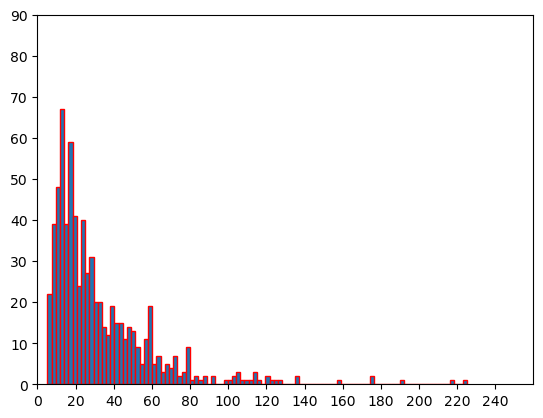

In [43]:
# On génére une visualisation de la répartition des valeurs de prix :
plt.hist(join_inner['price'],edgecolor="red",bins=100)
plt.xticks(range(0,250,20))
plt.xlim(0,260)
plt.ylim(0,90)
plt.show()

In [44]:
# On peut s'imaginer que toutes les valeurs au-dessus de 140 € sont atypiques.
# et peut-être à vérifier :

join_2 = join_inner.loc[join_inner['price']>150,:]
join_2.sort_values('price',ascending=False)

# Les voici ci_dessous, classées en ordre décroissant :

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge,CA
199,4352,1,225.0,0,outofstock,15940,15940,0,0,0,...,2020-03-07 10:18:45,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,1125.0
426,5001,1,217.5,20,instock,14581,14581,0,0,0,...,2020-05-16 07:00:05,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
587,5892,1,191.3,10,instock,14983,14983,0,0,0,...,2020-04-01 07:30:09,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,573.9
218,4402,1,176.0,8,instock,3510,3510,0,0,0,...,2020-08-22 09:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,2288.0
553,5767,1,175.0,12,instock,15185,15185,0,0,0,...,2020-06-11 13:25:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
221,4406,1,157.0,3,instock,7819,7819,0,0,0,...,2020-03-14 15:05:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
